# Rotation Halts Cylindrical Relativistic Gravitational Collapse by Apostolatos and Thorne
##  Geoff Cope
##  University of Utah
##  December 22, 2021

One reference for the Einstein Rosen Metric is given here in the paper:  "Rotation Halts Cylindrical Relativistic Gravitational Collapse" by Apostolatos & Thorne.  The vacuum field equations are listed as equation 16 which we derive here.  The solutions are arbitrary and will be fixed at a later time.

https://core.ac.uk/download/pdf/216103864.pdf

https://journals.aps.org/prd/abstract/10.1103/PhysRevD.46.2435

Here's a very useful link about bessel functions:

https://sudonull.com/post/31698-Bessel-Functions-in-SymPy-Symbolic-Math-Program

In [61]:
from sympy import init_session
init_session()

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [62]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [63]:
t,r,z,phi,dt,dr,dz,dphi = symbols('t r z phi dt dr dz dphi')

In [64]:
gamma = symbols('gamma')
psi = symbols('psi')

In [65]:
variables = Matrix( [t,r,z,phi])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢z⎥
⎢ ⎥
⎣φ⎦

In [66]:
differentials = Matrix( [dt,dr,dz,dphi])
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢ dz ⎥
⎢    ⎥
⎣dphi⎦

In [67]:
gamma = Function('gamma')(t,r)
gamma

In [68]:
psi = Function('psi')(t,r)
psi

In [69]:
lineElement = expand(exp(2*(gamma-psi))* ((-1)*dt**2 + dr**2) + exp(2*psi)*dz**2 + r**2 * exp((-1)*2*psi)*dphi**2)
lineElement

In [70]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(t, r)  -2⋅ψ(t, r)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                 0             0       ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                            ⎥
⎢           0             ℯ         ⋅ℯ                0             0       ⎥
⎢                                                                           ⎥
⎢                                                  2⋅ψ(t, r)                ⎥
⎢           0                       0             ℯ                 0       ⎥
⎢                                                                           ⎥
⎢                                                              2  -2⋅ψ(t, r)⎥
⎣           0                       0                 0       r ⋅ℯ          ⎦

In [71]:
import sympy

In [72]:
m = sympy.Array(g)
m

⎡  2⋅γ(t, r)  -2⋅ψ(t, r)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                 0             0       ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(t, r)  -2⋅ψ(t, r)                            ⎥
⎢           0             ℯ         ⋅ℯ                0             0       ⎥
⎢                                                                           ⎥
⎢                                                  2⋅ψ(t, r)                ⎥
⎢           0                       0             ℯ                 0       ⎥
⎢                                                                           ⎥
⎢                                                              2  -2⋅ψ(t, r)⎥
⎣           0                       0                 0       r ⋅ℯ          ⎦

In [73]:
from einsteinpy.symbolic import *

In [74]:
syms = sympy.symbols("t r z phi")
t,r,z,phi = syms

In [75]:
metric = MetricTensor(m,syms)

In [76]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                                                                        
⎢⎡ ⎛     2⋅γ(t, r)  -2⋅ψ(t, r) ∂                2⋅γ(t, r)  -2⋅ψ(t, r) ∂          ⎞  -2⋅γ(t, r)  2⋅ψ(t, r)    ⎛     2⋅γ(t, r)  -2⋅ψ(t, r) 
⎢⎢-⎜- 2⋅ℯ         ⋅ℯ          ⋅──(γ(t, r)) + 2⋅ℯ         ⋅ℯ          ⋅──(ψ(t, r))⎟⋅ℯ          ⋅ℯ            -⎜- 2⋅ℯ         ⋅ℯ          ⋅
⎢⎢ ⎝                           ∂t                                     ∂t         ⎠                           ⎝                           
⎢⎢────────────────────────────────────────────────────────────────────────────────────────────────────────  ─────────────────────────────
⎢⎢                                                   2                                                                                   
⎢⎢                                                                                                                                       
⎢⎢ ⎛     2⋅γ(t, r)  -2⋅ψ(t, r) ∂  

In [77]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞                                                        
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                                      
⎢r⋅⎜───(γ(t, r)) - ───(γ(t, r)) - ───(ψ(t, r)) - 2⋅⎜──(ψ(t, r))⎟  + ───(ψ(t, r))⎟ + ──(γ(t, r)) - ──(ψ(t, r))                            
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r            ∂r                                     
⎢  ⎝∂r             ∂t             ∂r                                ∂t          ⎠                                                        
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────                            
⎢                                                     r                                                                                  
⎢                                 

In [78]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                        ∂                                               ∂                                               
⎢               2                2   1.0⋅──(γ(t, r))                                     ──(γ(t, r))                                     
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂r                    ∂           ∂             ∂t                                              
⎢- ⎜──(ψ(t, r))⎟  - ⎜──(ψ(t, r))⎟  + ───────────────       - 2⋅──(ψ(t, r))⋅──(ψ(t, r)) + ───────────                                     
⎢  ⎝∂r         ⎠    ⎝∂t         ⎠           r                  ∂r          ∂t                 r                                          
⎢                                                                                                                                        
⎢                                   ∂                                                         ∂                                          
⎢                                 

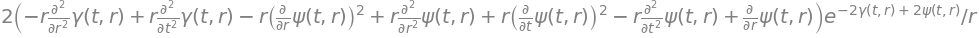

In [79]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [80]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                 

In [81]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                 

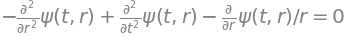

In [82]:
equation16a =  Eq(expand((1/r)*Ric.tensor()[2,2].args[1]),0)
equation16a 

In [83]:
equation16b = Eq(diff(gamma,r),solve( simplify(einst.tensor())[0,0] , diff(gamma,r) )[0] )
equation16b

In [84]:
equation16c = Eq( diff(gamma,t) , solve( simplify(einst.tensor())[1,0], diff(gamma,t) )[0] ) 
equation16c

In [85]:
fieldEquations = Matrix([equation16a,equation16b,equation16c] ) 
fieldEquations

/opt/anaconda3/lib/python3.8/site-packages/sympy/matrices/repmatrix.py:98: SymPyDeprecationWarning: 

non-Expr objects in a Matrix has been deprecated since SymPy 1.9. Use
list of lists, TableForm or some other data structure instead. See
https://github.com/sympy/sympy/issues/21497 for more info.

  SymPyDeprecationWarning(


⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(t, r))     ⎥
⎢    ∂              ∂             ∂r              ⎥
⎢ - ───(ψ(t, r)) + ───(ψ(t, r)) - ─────────── = 0 ⎥
⎢     2              2                 r          ⎥
⎢   ∂r             ∂t                             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(t, r)) = r⋅⎜⎜──(ψ(t, r))⎟  + ⎜──(ψ(t, r))⎟ ⎟⎥
⎢∂r              ⎝⎝∂r         ⎠    ⎝∂t         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(t, r)) = 2⋅r⋅──(ψ(t, r))⋅──(ψ(t, r))    ⎥
⎣    ∂t                ∂r          ∂t             ⎦

In [86]:
from sympy import * 

In [87]:
X, Y = map(Function, 'XY')

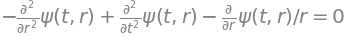

In [88]:
eq = fieldEquations[0]
eq

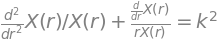

In [89]:
xODE = Eq(pde_separate( eq, psi, [X(r),Y(t)])[0] , k**2 ) 
xODE

In [90]:
from sympy import dsolve 

In [91]:
xSolution = dsolve( xODE , X(r))
xSolution 

In [92]:
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],1)
xSolutionParticular

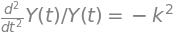

In [93]:
yODE = Eq( pde_separate( eq, psi, [X(r),Y(t)])[1] , - k**2 ) 
yODE

In [94]:
ySolution = dsolve( yODE , Y(t))
ySolution 

In [95]:
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

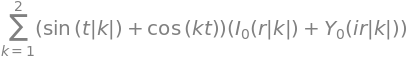

In [96]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )

In [97]:
psiSumTwoTerms = Eq(psi, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 
psiSumTwoTerms

In [98]:
expand( Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 

In [99]:
#  Change the complex exponentials to sin and cos 
expand( Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ).rewrite(cos)

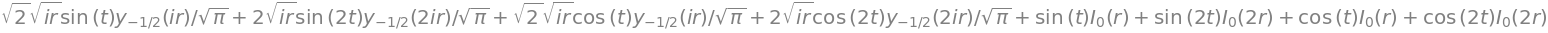

In [100]:
#  Change the complex exponentials to sin and cos and rewrite some bessenl functions 
expand( Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ).rewrite(cos).rewrite(yn)

In [101]:
#  figure out how to rewrite other bessel functions???? 

In [102]:
dgammadrPDE = fieldEquations[1].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadrPDE

In [105]:
dgammadrPDE.doit()

In [103]:
#  pdsolve( dgammadrPDE )

In [104]:
dgammadtPDE = fieldEquations[2].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadtPDE

In [108]:
dgammadtPDE.doit()

In [ ]:
#  pdsolve( dgammadtPDE )